# Práctica 7 - Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 2. Escribir una función que reciba un diccionario con las notas de los alumnos de curso y devuelva una serie con la nota mínima, la máxima, media y la desviación típica de cada uno.

In [22]:
def alumnos(**dicc):
    for k,v in dicc.items():
        minima = min(v)
        maxima = max(v)
        media = np.median(v)
        dt = round(np.std(v),2)
        notas = [minima, maxima, media, dt]
        print(f'{k}: {notas}')

notasAlumnos = {
    'Luis': [4, 5, 7],
    'Juan': [9, 8, 10],
    'María': [7, 5, 3],
    'Jimena': [6, 7, 9]
}

alumnos(**notasAlumnos)


Luis: [4, 7, 5.0, 1.25]
Juan: [8, 10, 9.0, 0.82]
María: [3, 7, 5.0, 1.63]
Jimena: [6, 9, 7.0, 1.25]


## 3. Escribir una función que reciba los datos siguientes en un DataFrame, una lista de meses, y devuelva el balance (ventas - gastos) total en los meses indicados.

In [23]:
datos = {'Mes':['Enero', 'Febrero', 'Marzo', 'Abril'], 'Ventas':[30500, 35600, 28300, 33900], 'Gastos':[22000, 23400, 18100, 20700]}

In [27]:
df = pd.DataFrame(datos)

In [28]:
def balance(df):
    df['Balance'] = df['Ventas'] - df['Gastos']
    print(df)

balance(df)

       Mes  Ventas  Gastos  Balance
0    Enero   30500   22000     8500
1  Febrero   35600   23400    12200
2    Marzo   28300   18100    10200
3    Abril   33900   20700    13200


## 4. El archivo autos.xlsx contiene datos de precios de autos y stock. Calcular el precio mínimo, el máximo y el promedio. Calcula y agrupa por tipo en relación a la suma de su stock. Construye un gráfico que lo represente.

In [2]:
df_autos = pd.read_excel('autos.xlsx')
print(df_autos.head())

   Orden  IDMARCA       MODELO            TIPO  PRECIO  AUMENTO  STOCK
0      1      100  99 Cavalier    Descapotable   19571     0.06      6
1      2      100    99 Blazer       Deportivo   18470     0.02      5
2      3      100    99 Camaro    Descapotable   22205     0.04      9
3      4      100    99 Malibu  Sedán Familiar   16000     0.06      5
4      5      100    99 Lumina  Sedán Familiar   18190     0.06      8


In [3]:
min = df_autos['PRECIO'].min()
max = df_autos['PRECIO'].max()
prom = df_autos['PRECIO'].mean()
print(f'Precio mínimo: {min} \nPrecio máximo: {max} \nPrecio promedio: {round(prom,2)}')

Precio mínimo: 10562 
Precio máximo: 39562 
Precio promedio: 19837.55


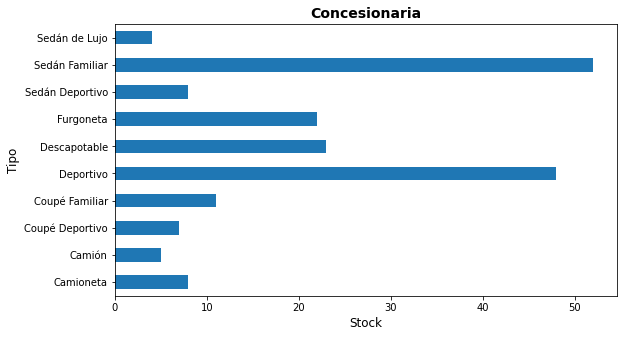

In [5]:
df_autos.groupby('TIPO')['STOCK'].sum().plot(kind='barh', figsize=(9,5))
plt.xlabel('Stock', size=12)
plt.ylabel('Tipo', size=12)
plt.title('Concesionaria', weight='bold', size=14)
plt.show()

## 5. El archivo comercio_interno.csv contiene información sobre el comercio interno del país desde la década del 90. Escribe un programa que:  
a. Genere un Data Frame con los datos del archivo.  
b. Muestre por pantalla las dimensiones del Data Frame, el número de datos que contiene, los nombres de sus columnas y filas, los tipos de datos de las columnas, las 10 primeras filas y las 10 últimas filas.  
c. Muestre por pantalla un gráfico de los datos de empleo por provincia y su relación con la columna valor.  
d. Muestre por pantalla la columna alcance_nombre ordenada alfabéticamente.  
e. Muestre un gráfico de las ventas_en centro de compras total entre los años 2016 al 2019.  
f. Muestre un gráfico de la actividad_producto_nombre agrupados en relación al valor.  
g. Emita cual es la actividad_producto_nombre que generó más valor.  
h. Sume por alcance_nombre los valores de los años 2009 al 2019.  
i. Muestre un gráfico de la actividad_producto_nombre en la provincia de Mendoza del año 2015 al 2019

## a. Genere un Data Frame con los datos del archivo.  

In [4]:
df_ci = pd.read_csv('comercio_interno.csv', encoding = 'unicode_escape')
df_ci.sample(3)

,sector_id,sector_nombre,variable_id,actividad_producto_nombre,indicador,unidad_de_medida,fuente,frecuencia_nombre,cobertura_nombre,alcance_tipo,alcance_id,alcance_nombre,indice_tiempo,valor
20517,31,Comercio interno,760,Otros rubros,"Vtas en super, a precios ctes",miles de pesos,INDEC,Mensual,Nacional,PROVINCIA,14,CORDOBA,01/02/2018,145993.895
28532,31,Comercio interno,1114,Verdulería y frutería,"Vtas en super, a precios ctes",miles de pesos,INDEC,Mensual,Nacional,PROVINCIA,90,TUCUMAN,01/04/2009,2673.000
5560,31,Comercio interno,359,Artículos de limpieza y perfumería,"Vtas en super, a precios ctes",miles de pesos,INDEC,Mensual,Nacional,PROVINCIA,6,BUENOS AIRES,01/03/2015,969336.241


In [42]:
df_ci.shape

(31284, 14)

In [5]:
print(f'Columnas: \n{df_ci.columns}')

Columnas: 
Index(['sector_id', 'sector_nombre', 'variable_id',
       'actividad_producto_nombre', 'indicador', 'unidad_de_medida', 'fuente',
       'frecuencia_nombre', 'cobertura_nombre', 'alcance_tipo', 'alcance_id',
       'alcance_nombre', 'indice_tiempo', 'valor'],
      dtype='object')


## b. Muestre por pantalla las dimensiones del Data Frame, el número de datos que contiene, los nombres de sus columnas y filas, los tipos de datos de las columnas, las 10 primeras filas y las 10 últimas filas.

### Dimensiones del DataFrame:

In [39]:
df_ci.shape

(31284, 14)

### Número de datos que contiene:

In [40]:
df_ci.size

437976

### Nombres de sus columnas:

In [41]:
df_ci.columns

Index(['sector_id', 'sector_nombre', 'variable_id',
       'actividad_producto_nombre', 'indicador', 'unidad_de_medida', 'fuente',
       'frecuencia_nombre', 'cobertura_nombre', 'alcance_tipo', 'alcance_id',
       'alcance_nombre', 'indice_tiempo', 'valor'],
      dtype='object')

### Descripción:

In [17]:
df_ci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31284 entries, 0 to 31283
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sector_id                  31284 non-null  int64  
 1   sector_nombre              31284 non-null  object 
 2   variable_id                31284 non-null  int64  
 3   actividad_producto_nombre  31284 non-null  object 
 4   indicador                  31284 non-null  object 
 5   unidad_de_medida           31284 non-null  object 
 6   fuente                     31284 non-null  object 
 7   frecuencia_nombre          31284 non-null  object 
 8   cobertura_nombre           31284 non-null  object 
 9   alcance_tipo               31284 non-null  object 
 10  alcance_id                 31284 non-null  int64  
 11  alcance_nombre             31284 non-null  object 
 12  indice_tiempo              31284 non-null  object 
 13  valor                      31284 non-null  flo

### 10 primeras filas:

In [18]:
df_ci.head(10)

,sector_id,sector_nombre,variable_id,actividad_producto_nombre,indicador,unidad_de_medida,fuente,frecuencia_nombre,cobertura_nombre,alcance_tipo,alcance_id,alcance_nombre,indice_tiempo,valor
0,31,Comercio interno,330,Alimentos preparados y rotisería,"Vtas en super (amp), a precios ctes",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/01/2017,340777.3882
1,31,Comercio interno,330,Alimentos preparados y rotisería,"Vtas en super (amp), a precios ctes",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/02/2017,328288.6951
2,31,Comercio interno,330,Alimentos preparados y rotisería,"Vtas en super (amp), a precios ctes",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/03/2017,353335.1548
3,31,Comercio interno,330,Alimentos preparados y rotisería,"Vtas en super (amp), a precios ctes",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/04/2017,359694.4537
4,31,Comercio interno,330,Alimentos preparados y rotisería,"Vtas en super (amp), a precios ctes",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/05/2017,336568.0085
5,31,Comercio interno,330,Alimentos preparados y rotisería,"Vtas en super (amp), a precios ctes",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/06/2017,345114.1199
6,31,Comercio interno,330,Alimentos preparados y rotisería,"Vtas en super (amp), a precios ctes",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/07/2017,380008.1679
7,31,Comercio interno,330,Alimentos preparados y rotisería,"Vtas en super (amp), a precios ctes",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/08/2017,370191.1923
8,31,Comercio interno,330,Alimentos preparados y rotisería,"Vtas en super (amp), a precios ctes",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/09/2017,362573.6633
9,31,Comercio interno,330,Alimentos preparados y rotisería,"Vtas en super (amp), a precios ctes",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/10/2017,381176.1241


### 10 últimas filas: 

In [19]:
df_ci.tail(10)

,sector_id,sector_nombre,variable_id,actividad_producto_nombre,indicador,unidad_de_medida,fuente,frecuencia_nombre,cobertura_nombre,alcance_tipo,alcance_id,alcance_nombre,indice_tiempo,valor
31274,31,Comercio interno,1141,Vtas en super_total,"Vtas en super, a precios k de abr 2016",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/10/2017,22584377.81
31275,31,Comercio interno,1141,Vtas en super_total,"Vtas en super, a precios k de abr 2016",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/11/2017,23284041.20
31276,31,Comercio interno,1141,Vtas en super_total,"Vtas en super, a precios k de abr 2016",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/12/2017,27589789.81
31277,31,Comercio interno,1141,Vtas en super_total,"Vtas en super, a precios k de abr 2016",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/01/2018,21545133.64
31278,31,Comercio interno,1141,Vtas en super_total,"Vtas en super, a precios k de abr 2016",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/02/2018,20612550.55
31279,31,Comercio interno,1141,Vtas en super_total,"Vtas en super, a precios k de abr 2016",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/03/2018,23285267.03
31280,31,Comercio interno,1141,Vtas en super_total,"Vtas en super, a precios k de abr 2016",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/04/2018,21473378.22
31281,31,Comercio interno,1141,Vtas en super_total,"Vtas en super, a precios k de abr 2016",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/05/2018,21684249.17
31282,31,Comercio interno,1141,Vtas en super_total,"Vtas en super, a precios k de abr 2016",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/06/2018,22420306.02
31283,31,Comercio interno,1141,Vtas en super_total,"Vtas en super, a precios k de abr 2016",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/07/2018,21869020.92


In [22]:
df_ci['fuente'].value_counts()

INDEC     28242
MTEySS     3042
Name: fuente, dtype: int64

## c. Muestre por pantalla un gráfico de los datos de empleo por provincia y su relación con la columna valor.  

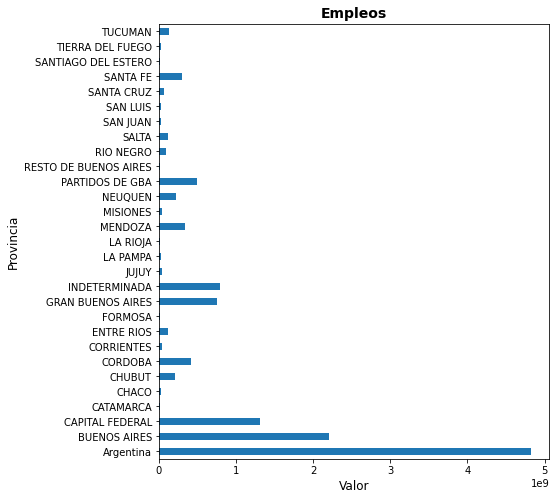

In [13]:
df_ci.groupby('alcance_nombre')['valor'].sum().plot(kind='barh', figsize=(7,8))
plt.xlabel('Valor', size=12)
plt.ylabel('Provincia', size=12)
plt.title('Empleos', weight='bold', size=14)
plt.show()

## d. Muestre por pantalla la columna alcance_nombre ordenada alfabéticamente.  

In [14]:
df_ci.sort_values(by='alcance_nombre')
df_ci.head()

,sector_id,sector_nombre,variable_id,actividad_producto_nombre,indicador,unidad_de_medida,fuente,frecuencia_nombre,cobertura_nombre,alcance_tipo,alcance_id,alcance_nombre,indice_tiempo,valor
0,31,Comercio interno,330,Alimentos preparados y rotisería,"Vtas en super (amp), a precios ctes",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/01/2017,340777.3882
1,31,Comercio interno,330,Alimentos preparados y rotisería,"Vtas en super (amp), a precios ctes",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/02/2017,328288.6951
2,31,Comercio interno,330,Alimentos preparados y rotisería,"Vtas en super (amp), a precios ctes",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/03/2017,353335.1548
3,31,Comercio interno,330,Alimentos preparados y rotisería,"Vtas en super (amp), a precios ctes",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/04/2017,359694.4537
4,31,Comercio interno,330,Alimentos preparados y rotisería,"Vtas en super (amp), a precios ctes",miles de pesos,INDEC,Mensual,Nacional,PAIS,200,Argentina,01/05/2017,336568.0085


## e. Muestre un gráfico de las ventas_en centro de compras total entre los años 2016 al 2019.  

In [86]:
df_ci['indice_tiempo'] = pd.to_datetime(df_ci['indice_tiempo'])
ejeX =df_ci[df_ci["indice_tiempo"].between('2016-01-01', '2019-12-31')]
print(ejeX.shape)

(17080, 14)


In [87]:
df_ci['actividad_producto_nombre'].value_counts()
ejeY = df_ci[df_ci['actividad_producto_nombre'].str.contains('Vtas en centro de compras_total')]
ejeY.shape

(209, 14)

## g. Emita cual es la actividad_producto_nombre que generó más valor.  

In [150]:
a = df_ci.groupby('actividad_producto_nombre')[['valor']].sum()
a = a[a['valor'] == a['valor'].max() ]
a

,valor
actividad_producto_nombre,
Vtas en super_total,5.825362e+09


## h. Sume por alcance_nombre los valores de los años 2009 al 2019.  

In [154]:
x = df_ci[ df_ci["indice_tiempo"].between('2009-01-01', '2019-12-31')]
x = x.groupby('alcance_nombre')[['valor']].sum()
x

,valor
alcance_nombre,
Argentina,4.771772e+09
BUENOS AIRES,2.210555e+09
CAPITAL FEDERAL,1.300774e+09
CATAMARCA,1.596949e+07
CHACO,2.710189e+07
CHUBUT,2.055153e+08
CORDOBA,4.187079e+08
CORRIENTES,3.932200e+07
ENTRE RIOS,1.195112e+08


# 6. La carpeta dataset contiene 3 archivos referentes a usuarios, votos y películas:  
a. Carga los archivos en dataframes.  
b. Mezcla y graba el resultado en un nuevo archivo utilizando to_csv(), pasándole como parámetro el separador ‘,’   
c. Genera el código de agrupamiento y agregación del tipo: ….groupby(*'movie_id', 'title'+)*'rating'+.agg(…. Que calcule: suma, cuenta, media, desviación estándar, utilizando las funciones de numpy (ej: np.sum)  
d. Modifica el código anterior para que calcule y reemplace la media mediante una función lambda pasada al método agg.   
e. Realiza los gráficos utilizando subplots que muestre los valores calculados en el punto c para las primeras 10 películas con mejor rating.

In [44]:
df1 = pd.read_fwf('movies.txt')
df2 = pd.read_fwf('ratings.txt')
df3 = pd.read_fwf('users.txt')